<ipython-input-11-5ad919e41033>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


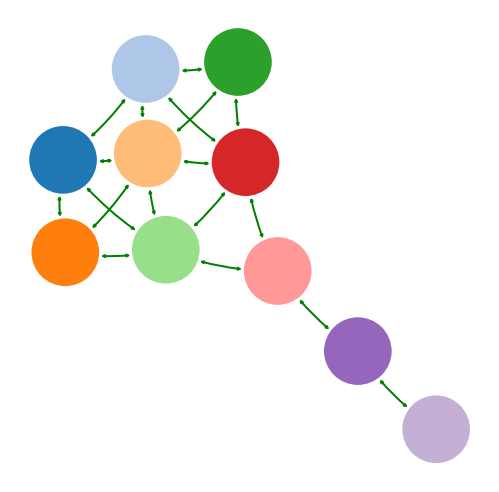

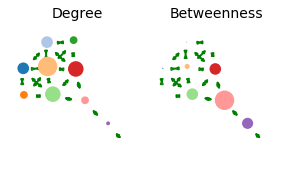

In [11]:
# kite graph stuff

import sys
sys.path.insert(0, '../') # python should allow for better imports..
import networkx as nx
from Utils import plotting as plotz, IO
import matplotlib.pyplot as plt, numpy as np
plt.style.use('seaborn-poster')
graph = nx.krackhardt_kite_graph()

pos = {i: np.array(j) * .08 for i, j in nx.nx_agraph.graphviz_layout(graph, prog = 'neato').items()}
fig, ax = plt.subplots()
plotz.addGraphPretty(graph, ax = ax, positions = pos, annotate = dict(annotate = False))
ax.axis('off')

# fig.savefig('../../thesis/presentation/kite.eps')
fig.show()

centralities = dict(Degree = nx.degree_centrality, \
                    Betweenness = nx.betweenness_centrality, \
#                     Closeness   = nx.closeness_centrality, \
                   )
#                     Current_flow= nx.current_flow_betweenness_centrality)
from matplotlib.patches import Circle
mapping = {node : idx for idx, node in enumerate(graph.nodes())}

fig, ax = plt.subplots(1, 2, figsize = (5, 5))
for tax, (name, f) in zip(ax.ravel(), centralities.items()):
    c = dict(f(graph))
    s = np.array(list(c.values()))
    s = (s - s.min()) /(s.max() - s.min()) 
    tax.axis('off')
    tax.set_aspect('equal','box')
    tax.set_title(name.replace('_', ' '), fontsize = 14)
    plotz.addGraphPretty(graph, tax, pos, \
                         mapping = mapping,\
                         annotate = dict(annotate = False),\
                        )
    for artist in tax.get_children():
        if isinstance(artist, Circle):
            lab = artist.get_label()
            lab = int(lab) if lab.isdigit() else lab
            pidx = mapping[lab]
            tmp  = (s[pidx]) * artist.radius 
            tax.add_artist(Circle(artist.center, facecolor = artist.get_facecolor(), radius = tmp))
            artist.set(facecolor = 'none')
fig.subplots_adjust(wspace = 0)
fig.savefig('kite_example.svg', transparent = 1,\
           bbox_inches = 'tight',\
           pad_inches = 0)
# fig.savefig('../../thesis/presentation/figures/kite_cent.eps')